In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Titanic Dataset 

In [99]:
gender_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [100]:
gender_data.count()

PassengerId    418
Survived       418
dtype: int64

In [101]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

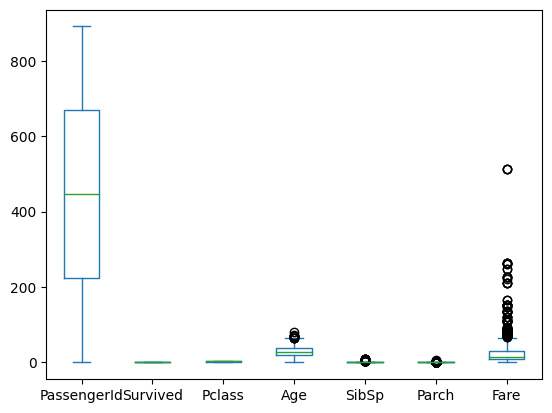

In [103]:
train.plot(kind = 'box')

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Embarked'>

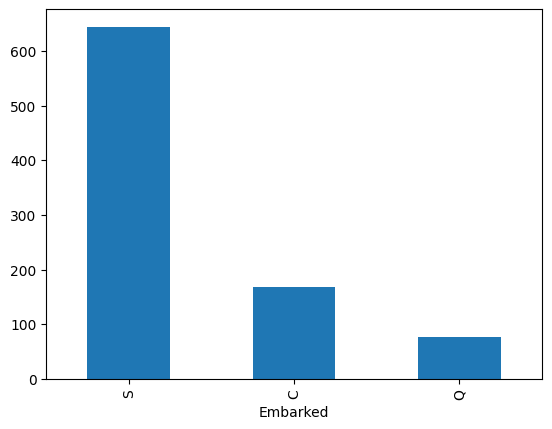

In [107]:
train['Embarked'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

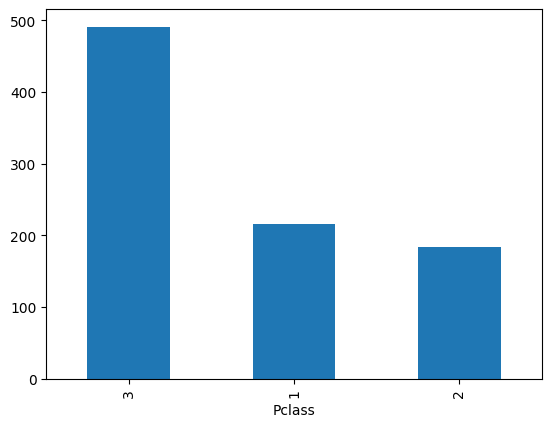

In [108]:
train['Pclass'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Survived'>

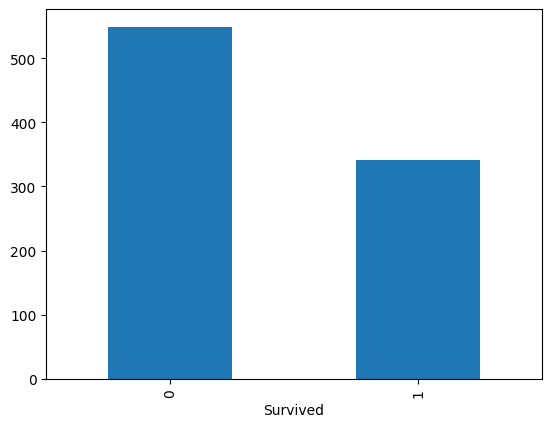

In [109]:
# male female survival

train['Survived'].value_counts().plot(kind = 'bar')

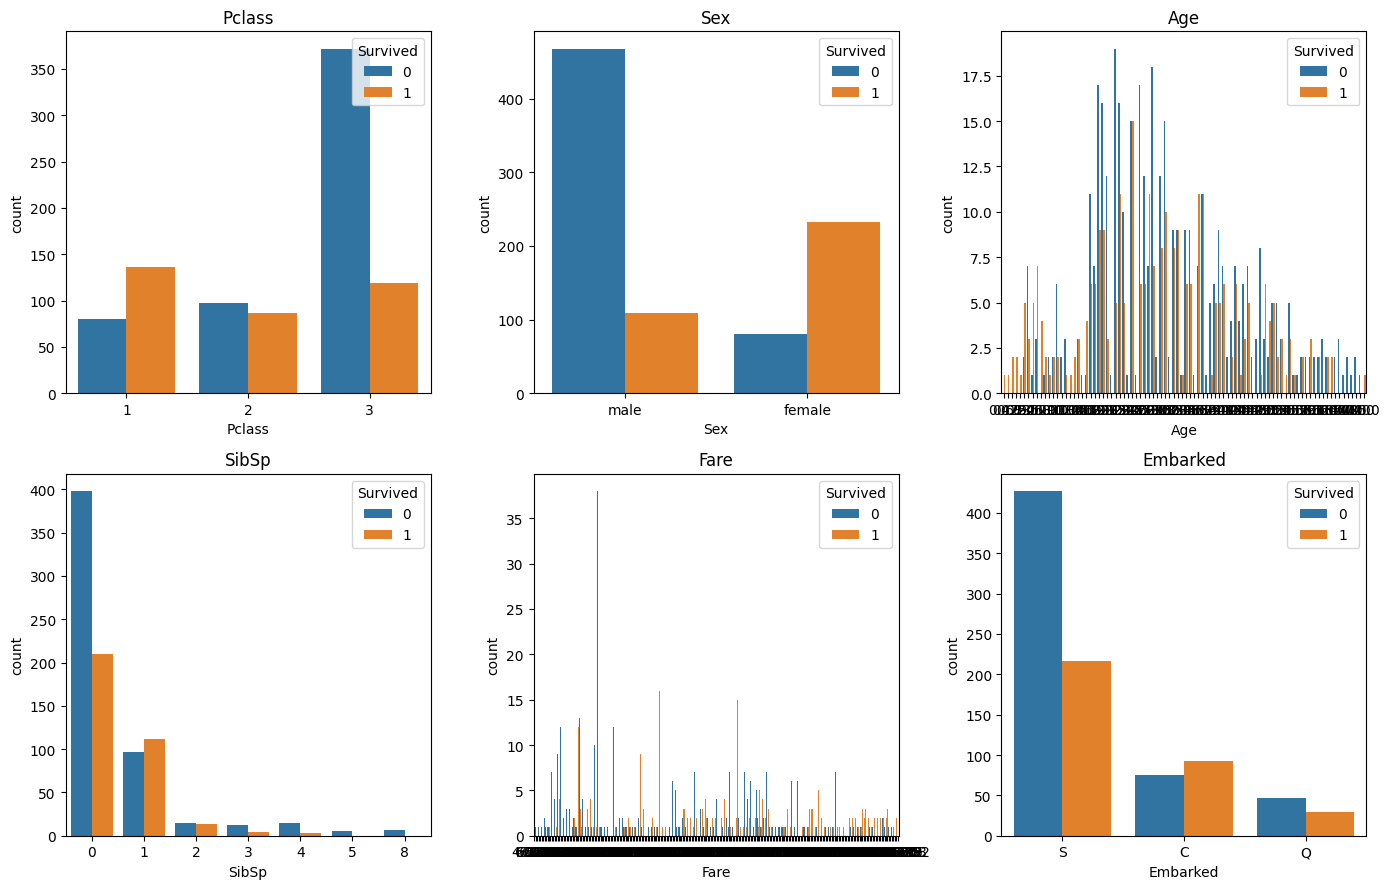

In [110]:
cols=['Pclass', 'Sex', 'Age', 'SibSp','Fare', 'Embarked']
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_rows*7,n_cols*3))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(x = train[cols[i]],hue=train['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
plt.tight_layout()

In [111]:
train.drop(['Ticket','Cabin','PassengerId'],axis=1, inplace = True)

In [112]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [113]:
# dealing with categorical
data = train
data.Sex=data.Sex.map({'female':0,'male':1})
data.Embarked=data.Embarked.map({'S':0,'Q':1,'C':2})

In [114]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0


In [115]:
# dealing with na

data.dropna(inplace = True)
data.Age.fillna(data.Age.mean(),inplace=True)
data.head()

/tmp/ipykernel_33/2364910432.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(data.Age.mean(),inplace=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0


In [116]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [117]:
# how to deal with name  ?? 

data['Name'].head(10).to_string().split()

['0',
 'Braund,',
 'Mr.',
 'Owen',
 'Harris',
 '1',
 'Cumings,',
 'Mrs.',
 'John',
 'Bradley',
 '(Florence',
 'Briggs',
 'Th...',
 '2',
 'Heikkinen,',
 'Miss.',
 'Laina',
 '3',
 'Futrelle,',
 'Mrs.',
 'Jacques',
 'Heath',
 '(Lily',
 'May',
 'Peel)',
 '4',
 'Allen,',
 'Mr.',
 'William',
 'Henry',
 '6',
 'McCarthy,',
 'Mr.',
 'Timothy',
 'J',
 '7',
 'Palsson,',
 'Master.',
 'Gosta',
 'Leonard',
 '8',
 'Johnson,',
 'Mrs.',
 'Oscar',
 'W',
 '(Elisabeth',
 'Vilhelmina',
 'Berg)',
 '9',
 'Nasser,',
 'Mrs.',
 'Nicholas',
 '(Adele',
 'Achem)',
 '10',
 'Sandstrom,',
 'Miss.',
 'Marguerite',
 'Rut']

In [119]:
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Other",
    "Rev": "Other", "Col": "Other", "Major": "Other", "Mlle": "Miss", "Countess": "Other",
    "Ms": "Mrs", "Lady": "Other", "Jonkheer": "Other", "Don": "Other", "Dona": "Other",
    "Mme": "Mrs", "Capt": "Other", "Sir": "Other"
}
data.Name = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data.Name = data.Name.map(title_mapping)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,1,22.0,1,0,7.2500,0.0
1,1,1,Mrs,0,38.0,1,0,71.2833,2.0
2,1,3,Miss,0,26.0,0,0,7.9250,0.0
3,1,1,Mrs,0,35.0,1,0,53.1000,0.0
4,0,3,Mr,1,35.0,0,0,8.0500,0.0


In [120]:
data.Name.value_counts()

Name
Mr        398
Miss      147
Mrs       109
Master     36
Other      22
Name: count, dtype: int64

In [121]:
data.Name = data.Name.map({'Mr': 0,'Miss':1 ,'Mrs':2 ,'Master':3  ,'Other':4})
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,22.0,1,0,7.2500,0.0
1,1,1,2,0,38.0,1,0,71.2833,2.0
2,1,3,1,0,26.0,0,0,7.9250,0.0
3,1,1,2,0,35.0,1,0,53.1000,0.0
4,0,3,0,1,35.0,0,0,8.0500,0.0


In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    data.drop(["Survived"],axis=1),
    data.Survived,
    test_size=0.2,
    random_state=0,
    stratify=data.Survived
)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Log_model=LogisticRegression()
Log_model.fit(X_train,y_train)

Y_pred=Log_model.predict(X_test)
accuracy_score(y_test,Y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8601398601398601

In [132]:
from sklearn.metrics import log_loss
log_loss_value = log_loss(y_test, Y_pred)

print(f'Log Loss: {log_loss_value}')

Log Loss: 5.041070404072329


## try some tuning

In [133]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'lbfgs'] 
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='neg_log_loss')

In [136]:
best_model = grid_search.best_estimator_

In [138]:
y_pred = best_model.predict_proba(X_test)

In [140]:
log_loss_value = log_loss(y_test, y_pred)

print(f'Improved Log Loss: {log_loss_value}')

Improved Log Loss: 0.3476103827325312


# Lets try with test data

In [142]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [143]:
test.drop(['Ticket','Cabin','PassengerId'],axis=1, inplace = True)

In [144]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [145]:
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Other",
    "Rev": "Other", "Col": "Other", "Major": "Other", "Mlle": "Miss", "Countess": "Other",
    "Ms": "Mrs", "Lady": "Other", "Jonkheer": "Other", "Don": "Other", "Dona": "Other",
    "Mme": "Mrs", "Capt": "Other", "Sir": "Other"
}
test.Name = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test.Name = test.Name.map(title_mapping)

test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.5,0,0,7.8292,Q
1,3,Mrs,female,47.0,1,0,7.0000,S
2,2,Mr,male,62.0,0,0,9.6875,Q
3,3,Mr,male,27.0,0,0,8.6625,S
4,3,Mrs,female,22.0,1,1,12.2875,S


In [146]:
test.Name = test.Name.map({'Mr': 0,'Miss':1 ,'Mrs':2 ,'Master':3  ,'Other':4})
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,male,34.5,0,0,7.8292,Q
1,3,2,female,47.0,1,0,7.0000,S
2,2,0,male,62.0,0,0,9.6875,Q
3,3,0,male,27.0,0,0,8.6625,S
4,3,2,female,22.0,1,1,12.2875,S


In [147]:
test.Sex=test.Sex.map({'female':0,'male':1})
test.Embarked=test.Embarked.map({'S':0,'Q':1,'C':2})
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,34.5,0,0,7.8292,1
1,3,2,0,47.0,1,0,7.0000,0
2,2,0,1,62.0,0,0,9.6875,1
3,3,0,1,27.0,0,0,8.6625,0
4,3,2,0,22.0,1,1,12.2875,0


In [148]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [149]:
test.Age.fillna(test.Age.mean(),inplace=True)

/tmp/ipykernel_33/2717440180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Age.fillna(test.Age.mean(),inplace=True)


In [150]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [153]:
test.Fare.fillna(test.Fare.mean(), inplace = True)
test.isnull().sum()

/tmp/ipykernel_33/2904562329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(test.Fare.mean(), inplace = True)


Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [154]:
y_pred = best_model.predict(test)

In [155]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [157]:
test2 = pd.read_csv('../input/titanic/test.csv')
submission=pd.DataFrame({
    "PassengerId":test2["PassengerId"],
    "Survived":y_pred
    })
submission.to_csv("submission_titanic.csv",index=False)

In [158]:
pred_df=pd.read_csv("submission_titanic.csv")

<Axes: xlabel='Survived', ylabel='count'>

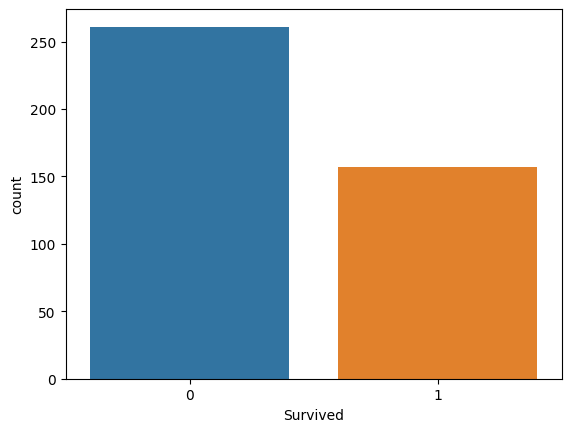

In [159]:
sns.countplot(x="Survived",data=pred_df)